데이터 탐색
==

다루는 내용
--
- 데이터 특성 보기, 데이터 탐색, 시각화
- 클러스터링

데이터
--
- 전력판매량(시도별/용도별) 액셀 파일 https://goo.gl/Cx8Rzw
- 위 자료는 전력거래소에서 받은 자료임
- 이 파일을 현재 작업중인 (쥬피터 노트북이 실행되는) 폴더 아래에 data 폴더를 만들고 data 폴더로 복사한다

필요한 라이브러리(모듈) 설치
--

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

데이터 읽기
--

In [3]:
power_data = pd.read_excel('data/시도별_용도별.xls')
print(power_data.shape)

(19, 28)


In [4]:
power_data

,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,...,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,...,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859
3,경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,...,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580,34647864
4,경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,...,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631,45455611
5,광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,...,198847,5967,236622,723764,512148,5140,13392,16049,2988274,8683649
6,대구,3151904,826396,5470438,6296834,69142,5858,5862633,212626,1057342,...,516493,58446,180189,252662,1381273,68127,41814,33616,5937633,15386372
7,대전,1872890,954681,3955921,4910602,28643,3326,2608343,204171,41687,...,77970,2949,83609,474561,218191,5439,31657,2252,2640312,9423804
8,부산,4473510,1305876,7582169,8888045,107927,25289,7512588,532943,528513,...,904149,4913,107717,90644,1046529,231141,49733,13104,7645804,21007358
9,서울,13131172,3581534,27647345,31228879,15150,4064,1918893,227077,497699,...,163688,4395,11425,46225,20182,17656,132707,2875,1938107,46298158


In [5]:
type(power_data)

pandas.core.frame.DataFrame

In [6]:
power_data.columns

Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
       '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
       '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계', '합계'],
      dtype='object')

In [7]:
power = power_data.set_index('구분')

In [8]:
power = power.drop(['합계', '개성'], errors='ignore')

In [9]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 강원 to 충북
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   주거용     17 non-null     int64
 1   공공용     17 non-null     int64
 2   서비스업    17 non-null     int64
 3   업무용합계   17 non-null     int64
 4   농림어업    17 non-null     int64
 5   광업      17 non-null     int64
 6   제조업     17 non-null     int64
 7   식료품제조   17 non-null     int64
 8   섬유,의류   17 non-null     int64
 9   목재,나무   17 non-null     int64
 10  펄프,종이   17 non-null     int64
 11  출판,인쇄   17 non-null     int64
 12  석유,화확   17 non-null     int64
 13  의료,광학   17 non-null     int64
 14  요업      17 non-null     int64
 15  1차금속    17 non-null     int64
 16  조립금속    17 non-null     int64
 17  기타기계    17 non-null     int64
 18  사무기기    17 non-null     int64
 19  전기기기    17 non-null     int64
 20  영상,음향   17 non-null     int64
 21  자동차     17 non-null     int64
 22  기타운송    17 non-null     int64
 23  가구및기타   17 non-null  

데이터 특성 보기
--
- boxplot
- barplot
- histogram

박스플롯
--

한글 폰트 설정 (맥, 윈도우, 리눅스)
--

In [12]:
import platform
from matplotlib import font_manager, rc

In [13]:
# 운영 체제마다 한글이 보이게 하는 설정
# 윈도우
if platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

In [14]:
power.describe()

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무",...,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,...,1.700000e+01,17.000000,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01,17.000000,1.700000e+01,1.700000e+01
mean,3.912786e+06,1.388502e+06,8.291312e+06,9.679813e+06,9.400665e+05,102720.176471,1.523205e+07,6.636738e+05,6.623886e+05,113237.000000,...,6.199825e+05,28781.235294,3.412887e+05,2.805870e+06,1.053153e+06,2.600299e+05,2.005222e+05,33137.000000,1.627484e+07,2.986743e+07
std,4.310227e+06,1.298531e+06,8.708909e+06,9.981623e+06,1.010972e+06,122502.337918,1.524290e+07,6.333206e+05,9.612365e+05,192034.155445,...,9.142491e+05,75569.163261,3.788489e+05,6.246070e+06,1.031256e+06,5.260199e+05,4.450945e+05,38105.462924,1.598920e+07,2.618055e+07
min,3.849030e+05,2.996750e+05,6.454240e+05,9.450990e+05,1.515000e+04,2898.000000,2.415370e+05,1.102110e+05,3.497000e+03,1324.000000,...,1.167000e+03,0.000000,7.710000e+02,0.000000e+00,7.730000e+02,0.000000e+00,1.743000e+03,743.000000,1.588755e+06,2.918758e+06
25%,1.940933e+06,8.263960e+05,3.955921e+06,4.910602e+06,7.460800e+04,14019.000000,2.910768e+06,2.041710e+05,7.589500e+04,6782.000000,...,7.797000e+04,4395.000000,8.360900e+04,4.622500e+04,1.134480e+05,1.765600e+04,1.339200e+04,2875.000000,2.988274e+06,1.538637e+07
50%,2.326183e+06,1.089613e+06,5.690659e+06,6.654683e+06,6.071390e+05,71529.000000,1.236782e+07,5.329430e+05,3.338460e+05,27998.000000,...,1.988470e+05,7240.000000,1.785020e+05,4.200050e+05,6.128980e+05,6.812700e+04,4.181400e+04,19725.000000,1.258230e+07,2.451531e+07
75%,3.856852e+06,1.400421e+06,7.582169e+06,8.888045e+06,1.747462e+06,139856.000000,2.145393e+07,9.327430e+05,7.316510e+05,72680.000000,...,7.825700e+05,14319.000000,4.289060e+05,1.124564e+06,2.156059e+06,1.239350e+05,1.327070e+05,46038.000000,2.462327e+07,3.464786e+07
max,1.658771e+07,5.533662e+06,3.343455e+07,3.896821e+07,3.096126e+06,398287.000000,5.660333e+07,2.544420e+06,3.780171e+06,639429.000000,...,3.613798e+06,317244.000000,1.125141e+06,2.451964e+07,2.977165e+06,2.048646e+06,1.833112e+06,133041.000000,5.929194e+07,1.148479e+08


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 26 Text xticklabel objects>)

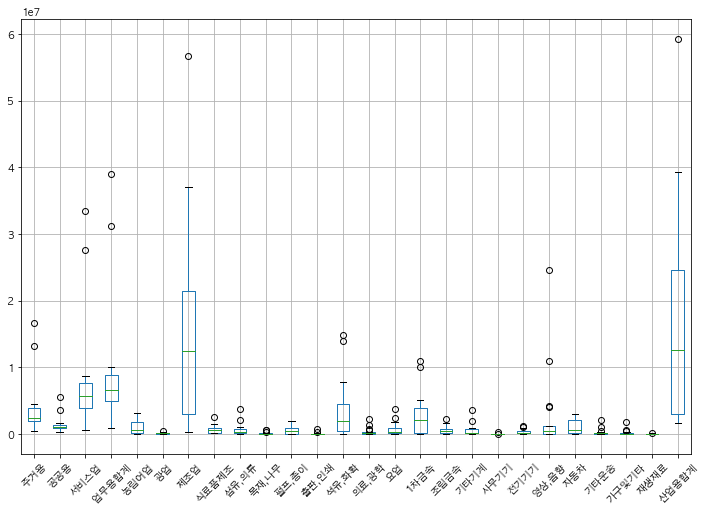

In [15]:
power.drop('합계', axis=1).boxplot(figsize=(12,8))
plt.xticks(rotation=45)

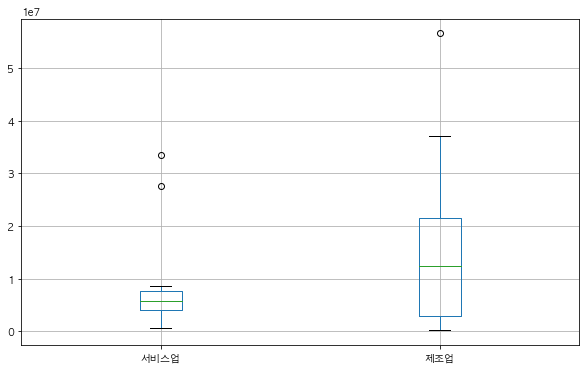

In [16]:
power[['서비스업','제조업']].boxplot(figsize=(10,6))

바 플롯 (수평형)
--

In [147]:
power = power.drop('합계', axis=1)

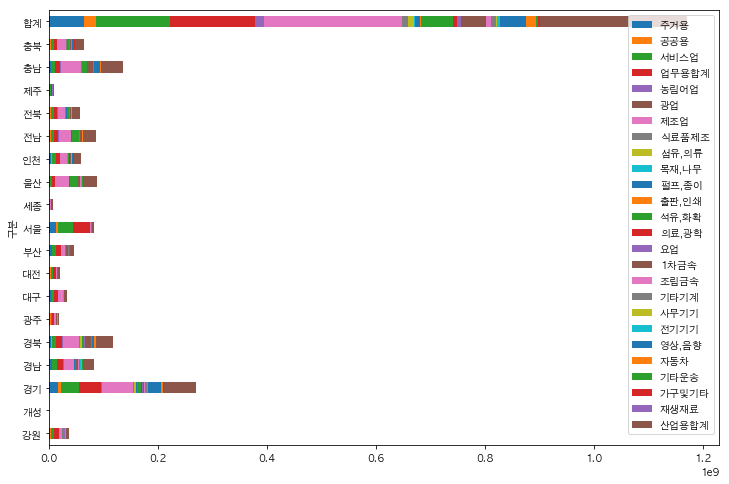

In [148]:
power.plot(kind='barh', figsize=(12,8), stacked=True)

In [149]:
power = power.drop(['합계', '개성'])

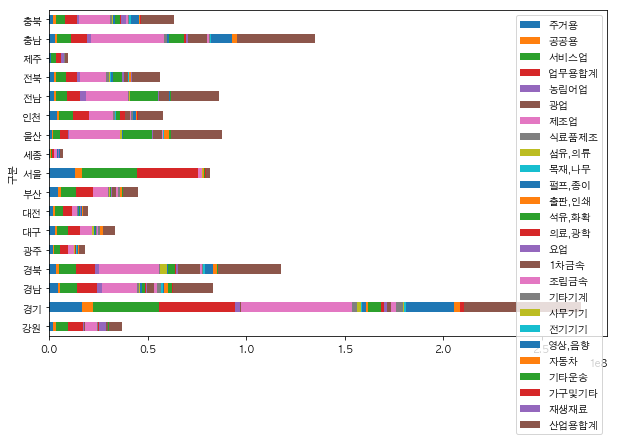

In [150]:
power.plot(kind='barh', figsize=(10,6), stacked=True)

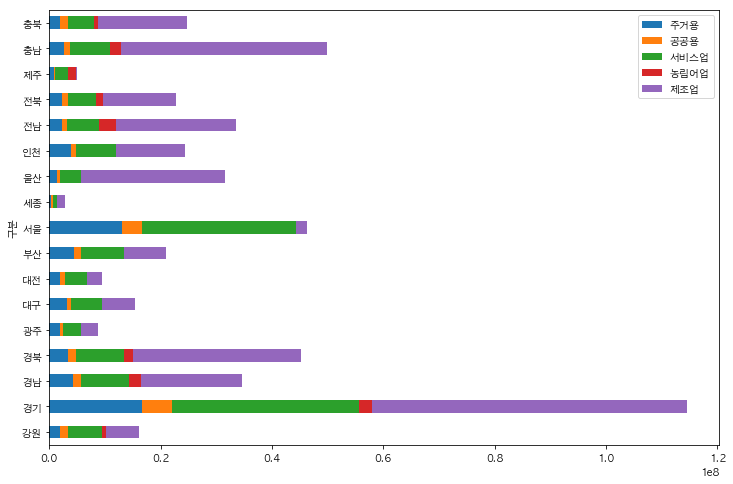

In [151]:
sample = ['주거용', '공공용', '서비스업', '농림어업', '제조업']
power[sample].plot(kind='barh', figsize=(12,8), stacked=True)

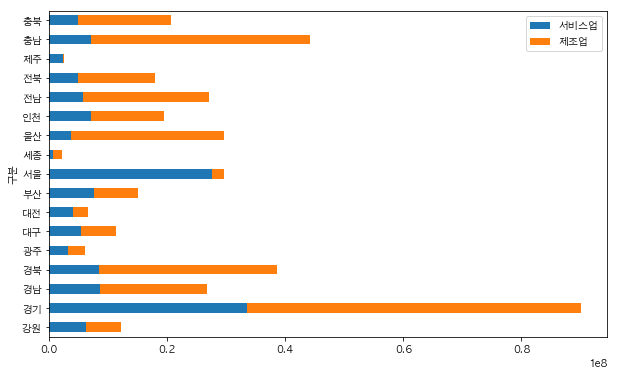

In [152]:
see2 = [ '서비스업','제조업']
power[see2].plot(kind='barh', figsize=(10,6), stacked=True)

In [153]:
power = power[['서비스업', '제조업']]
power.head(5)

,서비스업,제조업
구분,,
강원,6203749,6002286
경기,33434551,56603327
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768


히스토그램
--

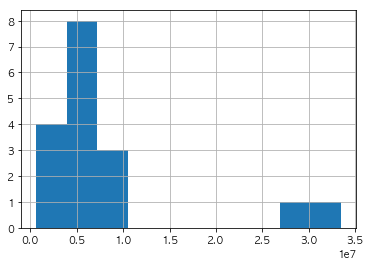

In [154]:
power['서비스업'].hist()

스캐터 플롯
--

In [155]:
print(power.shape)

(17, 2)


In [156]:
n_samples = power.shape[0]
n_samples

17

In [157]:
print(n_samples)

17


Text(0,0.5,'제조업')

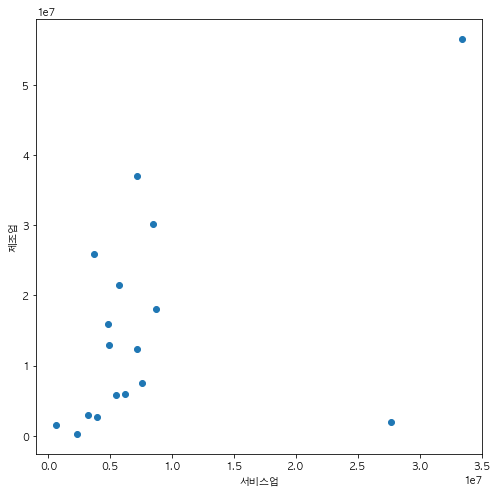

In [158]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'])
plt.xlabel('서비스업')
plt.ylabel('제조업')

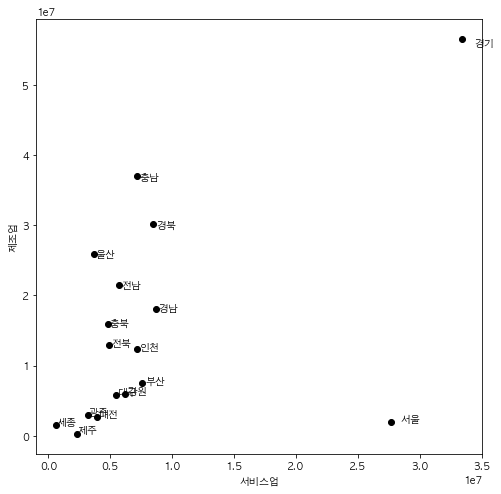

In [159]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

In [160]:
power = power.drop(['경기', '서울'])

In [161]:
power

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633
대전,3955921,2608343
부산,7582169,7512588
세종,645424,1502922
울산,3649386,25883132


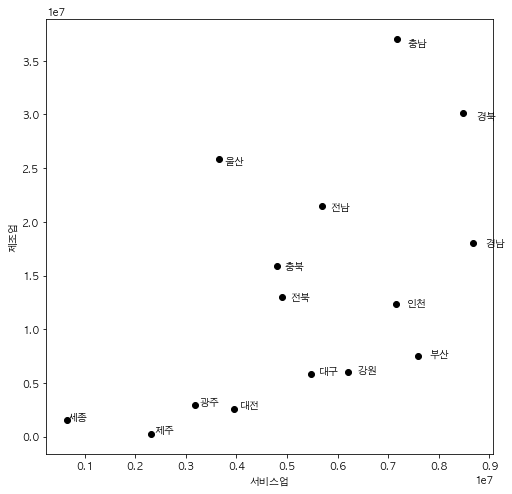

In [162]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])